# Scam Detection Algorithm using Logistic Regression Classification Model

## Imports and Data Visualization

In [1]:
### import Dependencies and Dataset

import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Marusenka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
### import dataset and replace the null values with a null string

dataset = pd.read_csv('SpamCollection(LG).csv')
data = dataset.where((pd.notnull(dataset)), '')

In [3]:
### inspect and visualize data

data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.shape

(5572, 2)

In [5]:
data.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


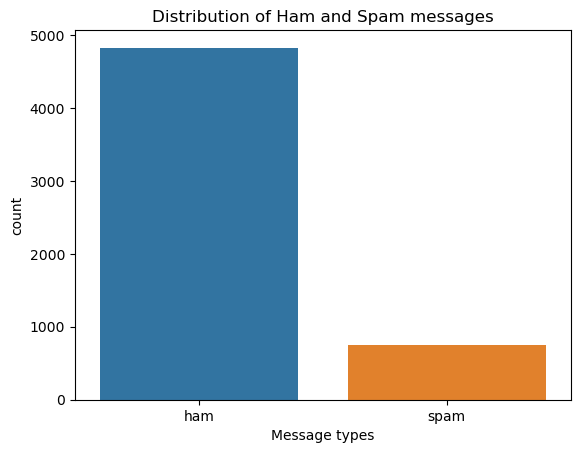

In [7]:
sns.countplot(x='Category', data=data)
plt.title('Distribution of Ham and Spam messages')
plt.xlabel('Message types')
plt.show()

C:\Users\Marusenka\AppData\Local\Temp\ipykernel_20044\3753508371.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham_msg.append(spam_msg)\


Text(0.5, 0, 'Message types')

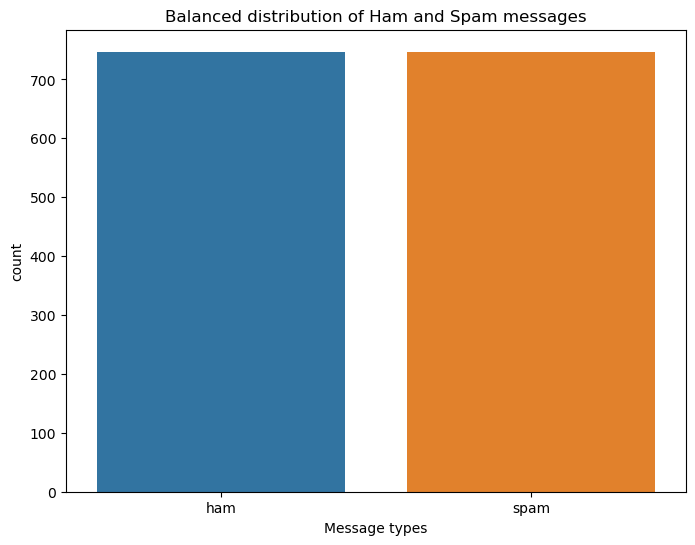

In [8]:
# downsample to balance the dataset

ham_msg = data[data.Category == "ham"]
spam_msg = data[data.Category == "spam"]
ham_msg = ham_msg.sample(n=len(spam_msg),
                         random_state=42)

data = ham_msg.append(spam_msg)\
    .reset_index(drop=True)

plt.figure(figsize=(8, 6))
sns.countplot(data = data, x='Category')
plt.title('Balanced distribution of Ham and Spam messages')
plt.xlabel('Message types')

In [9]:
data.shape

(1494, 2)

In [10]:
data.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham          747    725                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham         8  
spam        4

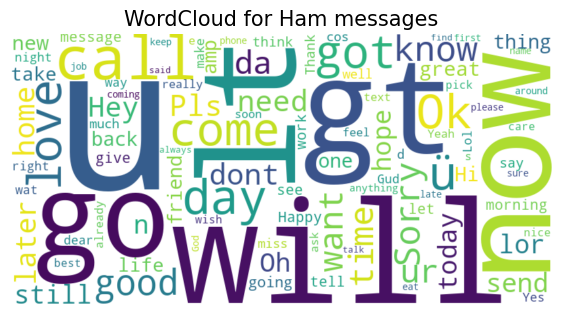

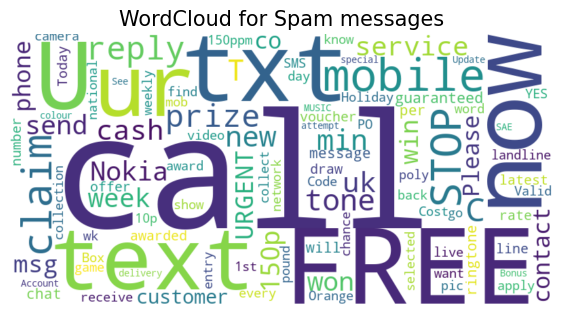

In [11]:
## visualize frequency of words

def plot_word_cloud(data, typ):
    message = " ".join(data['Message'])
    plt.figure(figsize=(7, 7))
    wc = WordCloud(background_color='white',
                   max_words=100,
                   width=800,
                   height=400,
                   collocations=False).generate(message)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} messages', fontsize=15)
    plt.axis('off')
    plt.show()
    
plot_word_cloud(data[data['Category'] == 'ham'], typ='Ham')
plot_word_cloud(data[data['Category'] == 'spam'], typ='Spam')

## Data Preparation

In [12]:
### remove punctuation from the dataset and transform all letters to lowercase

punctuation_list = string.punctuation
def remove_punctuation(text):
    remove_punct = "".join([word.lower() for word in text if word not in punctuation_list])
    return remove_punct
 
data['Message']= data['Message'].apply(lambda x: remove_punctuation(x))
data.head()

,Category,Message
0,ham,if i not meeting ü all rite then ill go home l...
1,ham,ill always be there even if its just in spirit...
2,ham,sorry that took so long omw now
3,ham,i thk 50 shd be ok he said plus minus 10 did ü...
4,ham,dunno i juz askin cos i got a card got 20 off ...


In [13]:
### remove stopwords (common words) from the dataset

def remove_stopwords(text):
    stop_words = stopwords.words('english')
    ok_words = []
    for word in str(text).split():
        if word not in stop_words:
            ok_words.append(word)
    output = " ".join(ok_words)
    return output
 
data['Message'] = data['Message'].apply(lambda text: remove_stopwords(text))
data.head()

,Category,Message
0,ham,meeting ü rite ill go home lor ü dun feel like...
1,ham,ill always even spirit ill get bb soon trying ...
2,ham,sorry took long omw
3,ham,thk 50 shd ok said plus minus 10 ü leave line ...
4,ham,dunno juz askin cos got card got 20 4 salon ca...


In [14]:
### transform spam and ham categories into numerical data

data.loc[data['Category'] == 'ham', 'Category', ] = 0
data.loc[data['Category'] == 'spam', 'Category', ] = 1

In [15]:
### create train and test data (80%-20%)

X = data['Message']
Y = data['Category']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [16]:
### store data (wordcount) as a matrix (for X) and convert to integers (for Y)

tf = TfidfVectorizer(min_df = 1)

X_train_count = tf.fit_transform(X_train.values)
X_test_count = tf.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

## Model Building

In [17]:
### fit model against training data with Logistic Regression model

model = LogisticRegression()
model.fit(X_train_count, Y_train)

print('Accuracy score on train data is: ', model.score(X_train_count, Y_train))

Accuracy score on train data is:  0.9782426778242678


In [18]:
### pre-test ham message

message_ham = ['Hey wanna hang out later this afternoon?']
message_ham_count = tf.transform(message_ham)
if model.predict(message_ham_count) == [0]:
    print('Message is not a scam')
else:
    print('Message is a scam')

Message is not a scam


In [19]:
#pre-test spam message

message_spam = ['Congrats! You won an Iphone, click here to receive your prize']
message_spam_count = tf.transform(message_spam)
if model.predict(message_spam_count) == [0]:
    print('Message is not a scam')
else:
    print('Message is a scam')

Message is a scam


In [20]:
### test trained model against testing data

print('Accuracy score on test data is: ', model.score(X_test_count, Y_test))

Accuracy score on test data is:  0.9464882943143813


In [21]:
## export fitted vocabulary

x_data = tf.fit(X_train.values)
pickle.dump(x_data, open("LGvectorizer.pkl", "wb"))

In [22]:
## export model

pickle.dump(model, open("LG_scam_detection_model.pkl", "wb"))